# インポート

In [2]:
import create_population
import create_population3
import preprocessing
from feature_engineering import FeatureCreator
from feature_engineering_prediction import PredictionFeatureCreator

import prediction

import pandas as pd




from train_lightgbm_rank_diff import Trainer_lightgbm_rank_diff 
from train_lightgbm_rank_niti import Trainer_lightgbm_rank_niti
from train_lightgbm_time import Trainer_lightgbm_time
from train_lightgbm_rank_kaiki import Trainer_lightgbm_rank_kaiki

from evaluation_lightgbm_rank_diff import Evaluator_lightgbm_rank_diff
from evaluation_lightgbm_rank_niti import Evaluator_lightgbm_rank_niti
from evaluation_lightgbm_time_kaiki import Evaluator_lightgbm_time_kaiki
from evaluation_lightgbm_rank_kaiki import Evaluator_lightgbm_rank_kaiki
from evaluation_pop import Evaluator_pop

%load_ext autoreload

In [22]:
%autoreload

# 学習母集団の作成

In [13]:
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
# population = create_population.create(from_="2020-01-01", to_="2023-12-31")
population = create_population.create(from_="2018-01-01", to_="2023-12-31")
# #テスト用
# population = create_population.create(from_="2022-01-01", to_="2023-12-31")


In [14]:
population

,race_id,date,horse_id
0,201806010101,2018-01-06,2015104603
1,201806010101,2018-01-06,2015106010
2,201806010101,2018-01-06,2015105549
3,201806010101,2018-01-06,2015103961
4,201806010101,2018-01-06,2015103269
...,...,...,...
276984,202309050912,2023-12-28,2017104873
276985,202309050912,2023-12-28,2019100653
276986,202309050912,2023-12-28,2017106240
276987,202309050912,2023-12-28,2018103205


# データ加工

In [15]:
#まとめて実行
# レース結果テーブルの前処理
results_preprocessed = preprocessing.process_results()
# 馬の過去成績テーブルの加工
horse_results_preprocessed = preprocessing.process_horse_results()
# レース情報テーブルの前処理
race_info_preprocessed = preprocessing.process_race_info()
# 騎手リーディングテーブルの前処理
jockey_leading_preprocessed = preprocessing.process_jockey_leading()
# 調教師リーディングテーブルの前処理
trainer_leading_preprocessed = preprocessing.process_trainer_leading()
# 血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds()
# 種牡馬リーディングテーブルの前処理
sire_leading_preprocessed = preprocessing.process_sire_leading()
# 払い戻しテーブルの前処理_２度目をするならcsvファイルを消さないとダメ
return_tables_preprocessed = preprocessing.process_return_tables()

In [52]:
# レース結果テーブルの前処理
results_preprocessed = preprocessing.process_results()

In [16]:
# 重複チェック
results_preprocessed.duplicated(subset=["race_id", "horse_id"]).sum()

np.int64(0)

In [6]:
# 欠損チェック
results_preprocessed.isnull().sum()

race_id            0
horse_id           0
jockey_id          0
trainer_id         0
owner_id           0
rank               0
time               0
nobori             0
umaban             0
wakuban            0
tansho_odds        0
popularity         0
impost             0
sex                0
age                0
weight             0
weight_diff        0
n_horses           0
corner_1           0
corner_2         712
corner_3       46767
corner_4       52909
dtype: int64

In [63]:
results_preprocessed

,race_id,horse_id,jockey_id,trainer_id,owner_id,rank,time,nobori,umaban,wakuban,...,impost,sex,age,weight,weight_diff,n_horses,corner_1,corner_2,corner_3,corner_4
220852,202001010101,2018102410,1176,427,165033,4,110.5,36.7,1,1,...,52.0,1,2,442,0,6,1,1,1,1
220850,202001010101,2018105193,5339,386,486800,2,110.0,35.8,2,2,...,54.0,0,2,510,0,6,3,3,4,3
220851,202001010101,2018104800,1032,1082,415800,3,110.1,36.2,3,3,...,54.0,0,2,482,-6,6,2,2,2,2
220853,202001010101,2018100828,1116,1069,750030,5,111.0,36.6,4,4,...,54.0,0,2,426,-8,6,6,6,5,5
220854,202001010101,2018106434,1109,1010,312803,6,112.7,38.0,5,5,...,54.0,1,2,426,-2,6,3,3,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368104,202310030812,2019102542,1208,1161,17803,1,160.0,36.5,8,6,...,53.0,1,4,442,-2,12,4,4,2,1
368109,202310030812,2020103754,1116,1104,651031,6,162.6,38.4,9,7,...,55.0,0,3,468,0,12,7,7,9,6
368107,202310030812,2020100400,1193,1092,180800,4,161.8,36.9,10,7,...,50.0,1,3,458,6,12,11,11,12,10
368105,202310030812,2020103663,732,1092,226800,2,160.9,37.3,11,8,...,55.0,2,3,486,-6,12,5,5,2,2


In [53]:
# 馬の過去成績テーブルの加工
horse_results_preprocessed = preprocessing.process_horse_results()


In [70]:
horse_results_preprocessed

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses,time,win,rentai,show,place,pase_1,pase_2
16,2019103610,2022-12-04,16.0,0.0,2.5,1.0,0,1200,0.0,5.0,16.0,74.5,0,0,0,7.0,34.4,37.6
17,2019103610,2022-09-25,15.0,0.0,3.1,1.0,0,1200,2.0,3.0,16.0,72.8,0,0,0,6.0,33.2,36.5
18,2019103610,2022-08-14,12.0,0.0,1.9,1.0,0,1000,2.0,3.0,12.0,61.1,0,0,0,1.0,34.4,36.4
19,2019103610,2022-06-18,1.0,770.0,0.0,1.0,0,1000,0.0,2.0,12.0,58.8,1,1,1,2.0,34.4,35.9
20,2019103610,2022-06-12,4.0,120.0,0.4,1.0,0,1000,0.0,2.0,12.0,59.1,0,0,0,2.0,34.5,35.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305459,2021102427,2024-04-06,8.0,0.0,2.3,2.0,0,1800,2.0,1.0,14.0,117.5,0,0,0,6.0,39.1,38.0
305460,2021102427,2023-12-28,13.0,0.0,2.5,1.0,1,1800,0.0,0.0,14.0,110.0,0,0,0,9.0,36.0,34.1
305469,2021103807,2024-02-24,11.0,0.0,3.4,2.0,0,1800,2.0,1.0,11.0,118.9,0,0,0,9.0,36.8,39.7
305470,2021103807,2024-01-13,11.0,0.0,2.1,1.0,0,1800,0.0,1.0,14.0,117.9,0,0,0,8.0,35.8,39.8


In [8]:
# 欠損チェック
horse_results_preprocessed.isnull().sum()

horse_id                   0
rank_per_horse             0
date                       0
rank                       0
prize                      0
rank_diff                  0
umaban                     0
wakuban                    0
weather                    0
race_type                  0
course_len                 0
ground_state               0
race_class                 0
n_horses                   0
time                       0
time_courselen             0
nobori                     0
win                        0
rentai                     0
show                       0
place                      0
corner_1_per_horse         0
corner_2_per_horse      3025
corner_3_per_horse    194735
corner_4_per_horse    217913
race_position              0
pase_diff              41367
pase_category          41367
corner_1                   0
corner_2                3025
corner_3              194735
corner_4              217913
pase_1                     0
pase_2                     0
dtype: int64

In [72]:
# 欠損値がある行を表示
missing_rows = horse_results_preprocessed[horse_results_preprocessed.isnull().any(axis=1)]
display(missing_rows)

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses,time,win,rentai,show,place,pase_1,pase_2


In [20]:
# 重複チェック
horse_results_preprocessed.duplicated(subset=["horse_id", "date"]).sum()

0

In [29]:
# レース情報テーブルの前処理
race_info_preprocessed = preprocessing.process_race_info()

In [20]:
race_info_preprocessed 

,race_id,date,race_type,around,course_len,weather,ground_state,race_class,place
20451,202206010101,2022-01-05,0,0.0,1200,1,0,1,6
20452,202206010102,2022-01-05,0,0.0,1800,1,0,1,6
20453,202206010103,2022-01-05,0,0.0,1800,1,0,1,6
20454,202206010104,2022-01-05,0,0.0,1800,1,0,0,6
20455,202206010105,2022-01-05,1,0.0,2000,1,0,2,6
...,...,...,...,...,...,...,...,...,...
27358,202309050908,2023-12-28,0,0.0,1400,1,0,2,9
27359,202309050909,2023-12-28,0,0.0,1800,1,0,3,9
27360,202309050910,2023-12-28,1,0.0,2000,1,0,3,9
27361,202309050911,2023-12-28,0,0.0,1800,1,0,5,9


In [9]:
# 欠損チェック
race_info_preprocessed.isnull().sum()

race_id                                    0
date                                       0
race_type                                  0
around                                     0
course_len                                 0
weather                                    0
ground_state                               0
race_class                                 0
place                                      0
season                                     0
place_season                               0
place_season_type                          0
kaisai_race                                0
kaisai_race_type                           0
day                                        0
day_type                                   0
kaisai_count                               0
kaisai_count_type                          0
place_season_day_type                      0
day_condition                              0
place_season_condition_type                0
place_season_condition_type_categori       0
place_cour

In [161]:
# 欠損値がある行を表示
missing_rows_race = race_info_preprocessed[race_info_preprocessed.isnull().any(axis=1)]
display(missing_rows_race)

,race_id,date,race_type,around,course_len,weather,ground_state,race_class,place
31,202206010208,2022-01-08,2,NaN,3200,1,2,5,6
51,202206010304,2022-01-09,2,NaN,2880,1,2,1,6
123,202210010104,2022-01-15,2,NaN,2860,1,0,1,10
124,202210010105,2022-01-15,2,NaN,2860,1,0,1,10
159,202210010204,2022-01-16,2,NaN,2860,0,0,1,10
195,202210010304,2022-01-22,2,NaN,2860,1,0,5,10
196,202210010305,2022-01-22,2,NaN,2860,1,0,1,10
231,202210010404,2022-01-23,2,NaN,2860,3,1,1,10
267,202210010504,2022-01-29,2,NaN,2860,2,0,1,10
271,202210010508,2022-01-29,2,NaN,3390,1,0,5,10


In [30]:
# 騎手リーディングテーブルの前処理
jockey_leading_preprocessed = preprocessing.process_jockey_leading()

In [31]:
# 調教師リーディングテーブルの前処理
trainer_leading_preprocessed = preprocessing.process_trainer_leading()

In [32]:
# 血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds()

In [33]:
# 種牡馬リーディングテーブルの前処理
sire_leading_preprocessed = preprocessing.process_sire_leading()

In [34]:
sire_leading_preprocessed 

category,page_id,sire_id,year,race_type,n_races,n_wins,course_len,winrate
0,2022_01,000a011099,2022,0,566.0,65.0,1553.9,0.114841
1,2022_01,000a011099,2022,1,9.0,0.0,0.0,0.000000
2,2022_01,000a011155,2022,0,891.0,82.0,1432.3,0.092031
3,2022_01,000a011155,2022,1,72.0,1.0,1400.0,0.013889
4,2022_01,000a0113a1,2022,0,342.0,26.0,1434.6,0.076023
...,...,...,...,...,...,...,...,...
1757,2023_09,2013109168,2023,1,0.0,0.0,0.0,NaN
1758,2023_09,2014105108,2023,0,2.0,0.0,0.0,0.000000
1759,2023_09,2014105108,2023,1,1.0,0.0,0.0,0.000000
1760,2023_09,2014106077,2023,0,3.0,0.0,0.0,0.000000


In [14]:
# 払い戻しテーブルの前処理_２度目をするならcsvファイルを消さないとダメ
return_tables_preprocessed = preprocessing.process_return_tables()

In [15]:
return_tables_preprocessed

,race_id,bet_type,win_umaban,return
0,202206010101,単勝,[15],680
1,202206010101,複勝,[15],210
2,202206010101,複勝,[10],1600
3,202206010101,複勝,[4],170
4,202206010101,馬連,"[10, 15]",31040
...,...,...,...,...
75974,202309050912,ワイド,"[2, 5]",1380
75975,202309050912,ワイド,"[5, 12]",460
75976,202309050912,馬単,"[2, 12]",29610
75977,202309050912,三連複,"[2, 5, 12]",7370


#  特徴量作成

In [17]:
fc = FeatureCreator()
features = fc.create_features()

agg_horse_n_races_relative:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_jockey()...
running agg_jockey()...comp
running agg_trainer()...
running agg_trainer()...comp


agg_horse_per_course_len:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features()...comp
running agg_interval()...comp
running cross_features_2()...comp


agg_cross_encoded:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_3()...comp


agg_cross_zizoku_syunpatu:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_4()...comp
running cross_features_5()...comp
running cross_features_6()...comp


pase_category_win_1:   0%|          | 0/4 [00:00<?, ?it/s]

pase_category_win_2:   0%|          | 0/4 [00:00<?, ?it/s]

pase_category_win_3:   0%|          | 0/4 [00:00<?, ?it/s]

pase_category_win_4:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_7()...comp


agg_pase_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_8()...comp


agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_9()...comp


agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_10()...comp


agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_11()...comp


agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_12()...comp


agg_pase_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_13()...comp


agg_raceclass_rankdiff_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_14()...comp


agg_horse_per_ground_state_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_class:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_place_len:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_weather:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_sire()...
running agg_sire()...comp
merging all features...
merging all features...comp


In [3]:
#もしもカーネルがリセットした場合、ここからfeatureをとる
features = pd.read_csv("../data/02_features/features.csv", sep="\t")

In [18]:
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

np.int64(0)

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
features.head(100)

,race_id,date,horse_id,jockey_id,trainer_id,owner_id,rank,time,nobori,umaban,...,win_mean_10races_per_weather_relative,win_max_10races_per_weather_relative,win_min_10races_per_weather_relative,show_mean_10races_per_weather_relative,show_max_10races_per_weather_relative,show_min_10races_per_weather_relative,sire_n_races_relative,sire_n_wins_relative,sire_winrate_relative,sire_course_len_diff_relative
0,202006010101,2020-01-05,2017101464,1119,1132,752800,1,73.3,38.9,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202006010101,2020-01-05,2017103291,641,1163,854800,2,73.3,38.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202006010101,2020-01-05,2017103186,726,1024,629800,3,73.7,38.7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202006010101,2020-01-05,2017103154,1029,1030,149033,4,73.8,39.2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202006010101,2020-01-05,2017105401,5575,1059,37060,5,73.8,39.7,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188298,202309050912,2023-12-28,2017104873,1154,425,758005,12,69.5,33.6,11,...,NaN,NaN,NaN,NaN,NaN,NaN,0.923877,0.898673,0.075201,-0.632738
188299,202309050912,2023-12-28,2019100653,1138,1158,950006,13,69.5,34.2,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188300,202309050912,2023-12-28,2017106240,1018,1178,258033,14,69.6,34.5,7,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.471840,-0.792251,-0.781970,0.292419
188301,202309050912,2023-12-28,2018103205,1112,428,629800,15,69.8,34.9,16,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.853712,-0.844280,-0.409033,0.075847


In [19]:
#データ数チェック
train_df = features.query("date <= '2022-12-31'")
valid_df = features.query("'2022-01-01'<= date < '2023-01-01'")
test_df = features.query("date >= '2023-01-01'")
len(train_df),len(valid_df),len(test_df)
        # 「馬の過去成績」の欠損率
        self.valid_df = self.valid_df.query('rank_3races.notna()')
        self.test_df = self.test_df.query('rank_3races.notna()')


(229182, 45518, 45902)

In [9]:
list(features.columns)
import yaml
feature_cols = {
    "features": features.columns.drop(
        ["date","rank","rank_per_horse","time","nobori","corner_1","corner_2","corner_3","corner_4",
                        "corner_1_per_horse","corner_2_per_horse",
                        "corner_3_per_horse",
                        "corner_4_per_horse", "owner_id"]
    ).to_list()
}
print(feature_cols)
with open("config_lightgbm_niti_new.yaml","w") as file:
    yaml.dump(feature_cols,file
              )

{'features': ['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank_per_horse', 'umaban', 'wakuban', 'tansho_odds', 'popularity', 'impost', 'sex', 'age', 'weight', 'weight_diff', 'n_horses', 'corner_1_per_horse', 'corner_2_per_horse', 'corner_3_per_horse', 'corner_4_per_horse', 'race_type', 'around', 'course_len', 'weather', 'ground_state', 'race_class', 'place', 'season', 'place_season', 'place_season_type', 'kaisai_race', 'kaisai_race_type', 'day', 'day_type', 'kaisai_count', 'kaisai_count_type', 'place_season_day_type', 'day_condition', 'place_season_condition_type', 'place_season_condition_type_categori', 'place_course_category', 'place_course_tough', 'goal_range', 'curve', 'goal_slope', 'place_season_type_course_len', 'lap_type', 'rank_1races', 'rank_per_horse_1races', 'prize_1races', 'rank_3races', 'rank_per_horse_3races', 'prize_3races', 'rank_5races', 'rank_per_horse_5races', 'prize_5races', 'rank_10races', 'rank_per_horse_10races', 'prize_10races', 'rank_1000races', 'rank_pe

# 学習

In [52]:
trainer = Trainer_lightgbm_rank_niti()
evaluation_df = trainer.run(
    valid_start_date="2022-01-01",
    test_start_date="2023-01-01"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.214093
[200]	valid_0's binary_logloss: 0.205813
[300]	valid_0's binary_logloss: 0.203646
[400]	valid_0's binary_logloss: 0.203045
[500]	valid_0's binary_logloss: 0.202823
[600]	valid_0's binary_logloss: 0.202738
[700]	valid_0's binary_logloss: 0.202616
[800]	valid_0's binary_logloss: 0.202483
Early stopping, best iteration is:
[787]	valid_0's binary_logloss: 0.202469


,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
332189,202306010101,2020103575,1,1,1.8,1,14,0.409167
332190,202306010101,2020107073,0,2,7.4,3,5,0.110706
332191,202306010101,2020102562,0,3,36.1,6,1,0.025193
332192,202306010101,2020106345,0,4,4.2,2,15,0.210728
332193,202306010101,2020100039,0,5,7.9,4,9,0.079396
...,...,...,...,...,...,...,...,...
379457,202309050912,2017104873,0,12,172.3,13,11,0.002754
379458,202309050912,2019100653,0,13,94.7,12,15,0.008027
379459,202309050912,2017106240,0,14,75.0,10,7,0.011200
379460,202309050912,2018103205,0,15,368.3,15,16,0.001759


-------------------- result --------------------
test_df's binary_logloss: 0.20520329265764875


In [53]:
#time回帰をした場合
trainer = Trainer_lightgbm_time()
evaluation_df = trainer.run(
    valid_start_date="2022-01-01",
    test_start_date="2023-01-01"
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.270799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290740
[LightGBM] [Info] Number of data points in the train set: 320094, number of used features: 1176
[LightGBM] [Info] Start training from score 102.307849
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 10.3836
[200]	valid_0's rmse: 4.07629
[300]	valid_0's rmse: 2.10111
[400]	valid_0's rmse: 1.63167
[500]	valid_0's rmse: 1.53144
[600]	valid_0's rmse: 1.49493
[700]	valid_0's rmse: 1.47304
[800]	valid_0's rmse: 1.46019
[900]	valid_0's rmse: 1.45059
[1000]	valid_0's rmse: 1.44451
[1100]	valid_0's rmse: 1.43923
[1200]	valid_0's rmse: 1.43418
[1300]	valid_0's rmse: 1.43254
[1400]	valid_0's rmse: 1.43089
[1500]	valid_0's rmse: 1.43033
[1600]	valid_0's rmse: 1.42932
[1700]	valid_0's rmse: 1.42741
[1800]	valid_0's rmse: 1.42617
[1900]	valid_0's rmse: 1.42554
[2000]

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
332189,202306010101,2020103575,72.6,1,1.8,1,14,72.967635
332190,202306010101,2020107073,72.9,2,7.4,3,5,73.300506
332191,202306010101,2020102562,72.9,3,36.1,6,1,74.387105
332192,202306010101,2020106345,73.4,4,4.2,2,15,73.512185
332193,202306010101,2020100039,73.9,5,7.9,4,9,73.360611
...,...,...,...,...,...,...,...,...
379457,202309050912,2017104873,69.5,12,172.3,13,11,69.025649
379458,202309050912,2019100653,69.5,13,94.7,12,15,69.169688
379459,202309050912,2017106240,69.6,14,75.0,10,7,68.795409
379460,202309050912,2018103205,69.8,15,368.3,15,16,69.475745


/Users/iniad/miniconda3/envs/kenkyu3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- result --------------------
test_df's root_mean_squared_error: 1.5602911816573144


In [23]:
# オッズと人気を特徴量から省いたランク＿二値
trainer = Trainer_lightgbm_rank_niti(config_filepath="config_lightgbm_niti_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2022-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_rank_niti_odds_removed",
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.232227
[200]	valid_0's binary_logloss: 0.225179
[300]	valid_0's binary_logloss: 0.222465
[400]	valid_0's binary_logloss: 0.221091
[500]	valid_0's binary_logloss: 0.220219
[600]	valid_0's binary_logloss: 0.219718
[700]	valid_0's binary_logloss: 0.219296
[800]	valid_0's binary_logloss: 0.219016
[900]	valid_0's binary_logloss: 0.218808
[1000]	valid_0's binary_logloss: 0.218568
[1100]	valid_0's binary_logloss: 0.218443
[1200]	valid_0's binary_logloss: 0.218342
[1300]	valid_0's binary_logloss: 0.218294
[1400]	valid_0's binary_logloss: 0.218185
[1500]	valid_0's binary_logloss: 0.218174
[1600]	valid_0's binary_logloss: 0.218075
[1700]	valid_0's binary_logloss: 0.218047
[1800]	valid_0's binary_logloss: 0.218017
[1900]	valid_0's binary_logloss: 0.217958
[2000]	valid_0's binary_logloss: 0.217904
[2100]	valid_0's binary_logloss: 0.217861
[2200]	valid_0's binary_logloss: 0.217848
[2300]	valid_0's binary

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
229182,202306010101,2020103575,1,1,1.8,1,14,0.441077
229183,202306010101,2020107073,0,2,7.4,3,5,0.152696
229184,202306010101,2020102562,0,3,36.1,6,1,0.036094
229185,202306010101,2020106345,0,4,4.2,2,15,0.223622
229186,202306010101,2020100039,0,5,7.9,4,9,0.104225
...,...,...,...,...,...,...,...,...
275079,202309050912,2017104873,0,12,172.3,13,11,0.007653
275080,202309050912,2019100653,0,13,94.7,12,15,0.016866
275081,202309050912,2017106240,0,14,75.0,10,7,0.041310
275082,202309050912,2018103205,0,15,368.3,15,16,0.004805


-------------------- Metrics --------------------
Log Loss: 0.2171
Accuracy: 0.7104
Precision: 0.1686
Recall: 0.7537
F1 Score: 0.2755
ROC AUC: 0.8056
test_df's binary_logloss: 0.2171483011008353


In [55]:
# オッズと人気を特徴量から省いた場合,time
trainer = Trainer_lightgbm_time(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2022-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_time_odds_removed",
    model_filename="model_lightgbm_time_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_time_odds_removed.csv"
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.262522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290466
[LightGBM] [Info] Number of data points in the train set: 320094, number of used features: 1174
[LightGBM] [Info] Start training from score 102.307849
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 10.3812
[200]	valid_0's rmse: 4.07815
[300]	valid_0's rmse: 2.11676
[400]	valid_0's rmse: 1.66007
[500]	valid_0's rmse: 1.56558
[600]	valid_0's rmse: 1.53113
[700]	valid_0's rmse: 1.51189
[800]	valid_0's rmse: 1.49977
[900]	valid_0's rmse: 1.49241
[1000]	valid_0's rmse: 1.4864
[1100]	valid_0's rmse: 1.48065
[1200]	valid_0's rmse: 1.47646
[1300]	valid_0's rmse: 1.47347
[1400]	valid_0's rmse: 1.47095
[1500]	valid_0's rmse: 1.46901
[1600]	valid_0's rmse: 1.46746
[1700]	valid_0's rmse: 1.46617
[1800]	valid_0's rmse: 1.4648
[1900]	valid_0's rmse: 1.46416
[2000]	v

,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
332189,202306010101,2020103575,72.6,1,1.8,1,14,72.801643
332190,202306010101,2020107073,72.9,2,7.4,3,5,73.005906
332191,202306010101,2020102562,72.9,3,36.1,6,1,74.637083
332192,202306010101,2020106345,73.4,4,4.2,2,15,73.701701
332193,202306010101,2020100039,73.9,5,7.9,4,9,73.187001
...,...,...,...,...,...,...,...,...
379457,202309050912,2017104873,69.5,12,172.3,13,11,68.673387
379458,202309050912,2019100653,69.5,13,94.7,12,15,68.975282
379459,202309050912,2017106240,69.6,14,75.0,10,7,68.574010
379460,202309050912,2018103205,69.8,15,368.3,15,16,69.062405


/Users/iniad/miniconda3/envs/kenkyu3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- result --------------------
test_df's root_mean_squared_error: 1.5918259135120951


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(evaluation_df["target"], evaluation_df["pred"])
plt.plot(fpr, tpr, label="ROC Curve")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color="red", label=f"Optimal Threshold ({optimal_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Optimal Threshold")
plt.legend()
plt.show()

# 最適な閾値の探索（例: TPR - FPR が最大の閾値を選択）
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")



# 精度評価

In [165]:
evaluator = Evaluator_pop()
summary_df = evaluator.summarize_box_exp(exp_name="pop")
summary_df

,topn,bet_type,hitrate_pop,returnrate_pop
0,1,単勝,0.331597,0.795833
1,1,複勝,0.639468,0.843605
0,2,ワイド,0.307002,0.778096
1,2,単勝,0.528646,0.799552
2,2,複勝,0.845775,0.835446
3,2,馬単,0.150752,0.731091
4,2,馬連,0.150752,0.761227
0,3,ワイド,0.548611,0.792438
1,3,三連単,0.088542,0.658415
2,3,三連複,0.088542,0.778414


In [166]:
evaluator = Evaluator_lightgbm_niti()
summary_df_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti")
summary_df_gbm

,topn,bet_type,hitrate_gbm,returnrate_gbm
0,1,単勝,0.337674,0.829774
1,1,複勝,0.633102,0.843056
0,2,ワイド,0.307581,0.816319
1,2,単勝,0.532697,0.828993
2,2,複勝,0.836516,0.840090
3,2,馬単,0.152199,0.788122
4,2,馬連,0.152199,0.820747
0,3,ワイド,0.540220,0.805363
1,3,三連単,0.087963,0.709356
2,3,三連複,0.087963,0.826794


In [ ]:
# rank_kaiki
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki")
summary_df_noodds_time

In [167]:
# time
evaluator = Evaluator_lightgbm_kaiki(evaluation_filename="evaluation_lightgbm_time.csv")
summary_df_time = evaluator.summarize_box_exp(exp_name="lightgbm_time")
summary_df_time

,topn,bet_type,hitrate_gbm_time,returnrate_gbm_time
0,1,単勝,0.279803,0.794647
1,1,複勝,0.585359,0.833999
0,2,ワイド,0.265046,0.773206
1,2,単勝,0.460938,0.805584
2,2,複勝,0.805845,0.830020
3,2,馬単,0.122685,0.795269
4,2,馬連,0.122685,0.805671
0,3,ワイド,0.494502,0.802218
1,3,三連単,0.077546,0.703144
2,3,三連複,0.077546,0.783015


In [ ]:
# オッズと人気を特徴量から省いた場合,rank_kaiki
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki_odds_removed.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki_noodds")
summary_df_noodds_time

In [24]:
# オッズと人気を特徴量から省いた場合_niti
evaluator = Evaluator_lightgbm_rank_niti(evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_rank_niti_noodds,returnrate_lightgbm_rank_niti_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.295342,0.813049,0.331021,0.791741
1,1,複勝,0.604559,0.849058,0.638916,0.842881
2,2,ワイド,0.257351,0.765874,0.305583,0.777073
3,2,単勝,0.475058,0.814354,0.524612,0.792303
4,2,複勝,0.814338,0.826908,0.846052,0.835613
5,2,馬単,0.115956,0.675206,0.148992,0.722101
6,2,馬連,0.115956,0.696895,0.148992,0.750743
7,3,ワイド,0.504790,0.831329,0.544433,0.780123
8,3,三連単,0.069376,0.751586,0.085894,0.641559
9,3,三連複,0.069376,0.832871,0.085894,0.753551


In [169]:
# オッズと人気を特徴量から省いた場合,time
evaluator = Evaluator_lightgbm_kaiki(evaluation_filename="evaluation_lightgbm_time_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_time_noodds_top3.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_time_noodds")
summary_df_noodds_time

,topn,bet_type,hitrate_gbm_time_noodds,returnrate_gbm_time_noodds
0,1,単勝,0.222512,0.835851
1,1,複勝,0.508970,0.818027
0,2,ワイド,0.206887,0.826418
1,2,単勝,0.370949,0.846311
2,2,複勝,0.717303,0.809071
3,2,馬単,0.090567,0.841016
4,2,馬連,0.090567,0.831597
0,3,ワイド,0.394965,0.783613
1,3,三連単,0.051215,1.762394
2,3,三連複,0.051215,1.477315


In [ ]:
# オッズと人気を特徴量から省いた場合,rank_diff
evaluator = Evaluator_lightgbm_rank_diff(evaluation_filename="evaluation_lightgbm_rank_diff_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_rank_diff_noodds_top3.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_diff_noodds")
summary_df_noodds_time

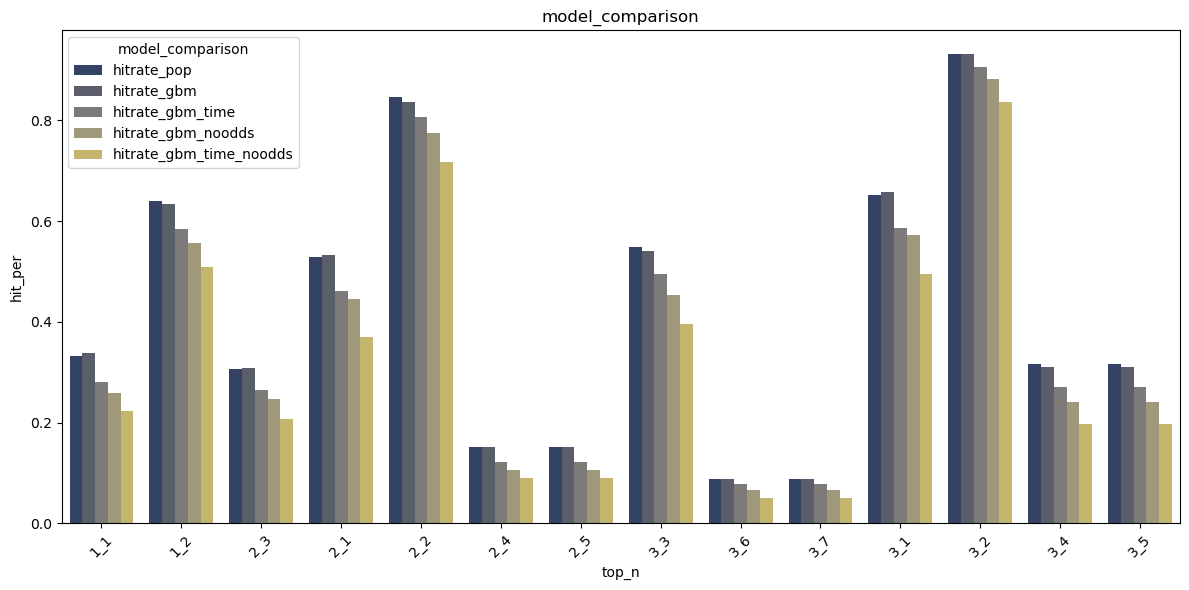

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 警告の無効化（必要に応じて）
pd.set_option('future.no_silent_downcasting', True)

# DataFrameを統合
df_combined = summary_df.merge(summary_df_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_gbm"))
df_combined = df_combined.merge(summary_df_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_time"))
df_combined = df_combined.merge(summary_df_noodds_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_gbm"))
df_combined = df_combined.merge(summary_df_noodds_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_time"))
df_combined = df_combined.reset_index(drop=True)

# 新しい列を作成
df_combined['bet_type'] = df_combined['bet_type'].replace({
    '単勝': 1, 
    '複勝': 2, 
    'ワイド': 3, 
    '馬単': 4, 
    '馬連': 5, 
    '三連単': 6, 
    '三連複': 7
})

# 'bet_type'を整数型に変換（NaNを保持したい場合は'Int64'を使用）
df_combined['bet_type'] = df_combined['bet_type'].astype('Int64')

# topnとbet_typeを組み合わせた列を作成
df_combined["topn_bettype"] = df_combined["topn"].astype(str) + "_" + df_combined["bet_type"].astype(str)

# 棒グラフの描画
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined.melt(id_vars=["topn_bettype"], 
                                    value_vars=["hitrate_pop", "hitrate_lightgbm_rank_niti", "hitrate_lightgbm_time", "hitrate_lightgbm_rank_niti_noodds", "hitrate_lightgbm_time_noodds"],
                                    var_name="model", 
                                    value_name="hitrate"),
             x="topn_bettype", 
             y="hitrate", 
             hue="model", 
             palette="cividis",  # 使用したいカラーパレットを指定
             errorbar=None)  # ci=Noneの代わりにerrorbar=Noneを使用

plt.xlabel("top_n")
plt.ylabel("hit_per")
plt.title("model_comparison")
plt.xticks(rotation=45)  # x軸のラベルを45度回転させて読みやすくします
plt.legend(title="model_comparison")
plt.tight_layout()  # レイアウトを自動調整
plt.show()


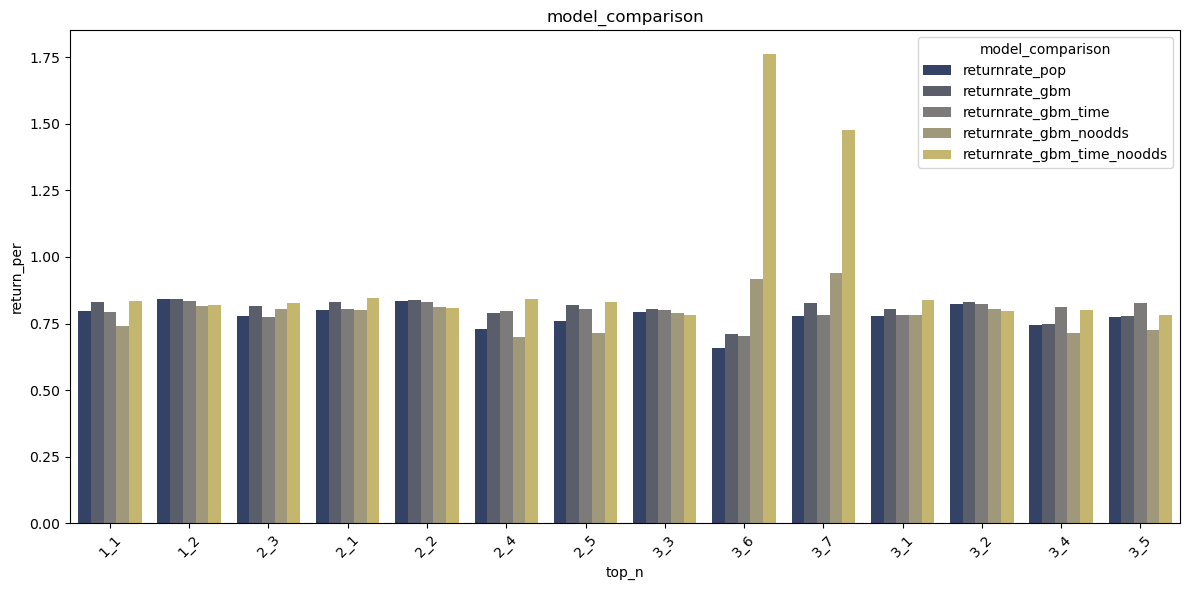

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 警告の無効化（必要に応じて）
pd.set_option('future.no_silent_downcasting', True)

# DataFrameを統合
df_combined = summary_df.merge(summary_df_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_gbm"))
df_combined = df_combined.merge(summary_df_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_time"))
df_combined = df_combined.merge(summary_df_noodds_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_gbm"))
df_combined = df_combined.merge(summary_df_noodds_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_time"))
df_combined = df_combined.reset_index(drop=True)

# 新しい列を作成
df_combined['bet_type'] = df_combined['bet_type'].replace({
    '単勝': 1, 
    '複勝': 2, 
    'ワイド': 3, 
    '馬単': 4, 
    '馬連': 5, 
    '三連単': 6, 
    '三連複': 7
})

# 'bet_type'を整数型に変換（NaNを保持したい場合は'Int64'を使用）
df_combined['bet_type'] = df_combined['bet_type'].astype('Int64')

# topnとbet_typeを組み合わせた列を作成
df_combined["topn_bettype"] = df_combined["topn"].astype(str) + "_" + df_combined["bet_type"].astype(str)

# 棒グラフの描画
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined.melt(id_vars=["topn_bettype"], 
                                    value_vars=["returnrate_pop", "returnrate_lightgbm_rank_niti", "returnrate_lightgbm_time", "returnrate_lightgbm_rank_niti_noodds", "returnrate_lightgbm_time_noodds"],
                                    var_name="model", 
                                    value_name="returnrate"),  # 変数名を'returnrate'に変更
             x="topn_bettype", 
             y="returnrate",  # y軸も'returnrate'に変更
             hue="model", 
             palette="cividis",  # 使用したいカラーパレットを指定
             errorbar=None)  # ci=Noneの代わりにerrorbar=Noneを使用

plt.xlabel("top_n")
plt.ylabel("return_per")  # y軸ラベルを'return_per'に変更
plt.title("model_comparison")
plt.xticks(rotation=45)  # x軸のラベルを45度回転させて読みやすくします
plt.legend(title="model_comparison")
plt.tight_layout()  # レイアウトを自動調整
plt.show()


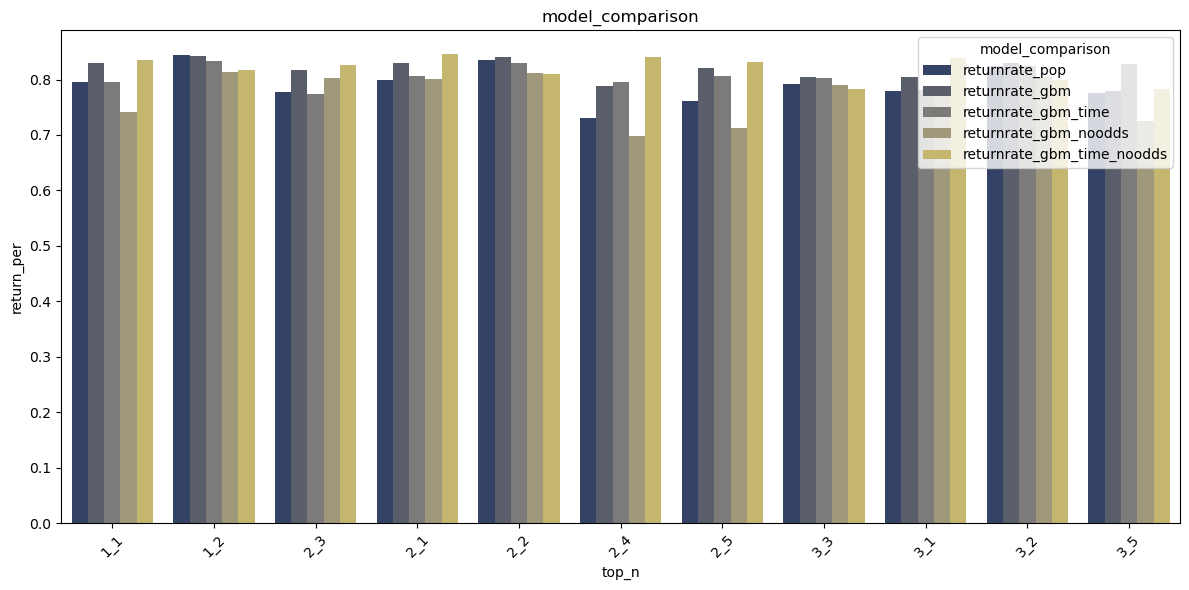

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 警告の無効化（必要に応じて）
pd.set_option('future.no_silent_downcasting', True)

# DataFrameを統合
df_combined = summary_df.merge(summary_df_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_gbm"))
df_combined = df_combined.merge(summary_df_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_time"))
df_combined = df_combined.merge(summary_df_noodds_gbm, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_gbm"))
df_combined = df_combined.merge(summary_df_noodds_time, on=["topn", "bet_type"], how="outer", suffixes=("", "_noodds_time"))
df_combined = df_combined.reset_index(drop=True)

# 新しい列を作成
df_combined['bet_type'] = df_combined['bet_type'].replace({
    '単勝': 1, 
    '複勝': 2, 
    'ワイド': 3, 
    '馬単': 4, 
    '馬連': 5, 
    '三連単': 6, 
    '三連複': 7
})

# 'bet_type'を整数型に変換（NaNを保持したい場合は'Int64'を使用）
df_combined['bet_type'] = df_combined['bet_type'].astype('Int64')

# topnとbet_typeを組み合わせた列を作成
df_combined["topn_bettype"] = df_combined["topn"].astype(str) + "_" + df_combined["bet_type"].astype(str)

# 外れ値を除外するための関数を定義
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 各モデルのreturnrateに対して外れ値を除外
value_vars=["returnrate_pop", "returnrate_lightgbm_rank_niti", "returnrate_lightgbm_time", "returnrate_lightgbm_rank_niti_noodds", "returnrate_lightgbm_time_noodds"],
for col in value_columns:
    df_combined = remove_outliers(df_combined, col)

# 棒グラフの描画
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined.melt(id_vars=["topn_bettype"], 
                                    value_vars=value_columns,
                                    var_name="model", 
                                    value_name="returnrate"),  # 変数名を'returnrate'に変更
             x="topn_bettype", 
             y="returnrate",  # y軸も'returnrate'に変更
             hue="model", 
             palette="cividis",  # 使用したいカラーパレットを指定
             errorbar=None)  # ci=Noneの代わりにerrorbar=Noneを使用

plt.xlabel("top_n")
plt.ylabel("return_per")  # y軸ラベルを'return_per'に変更
plt.title("model_comparison")
plt.xticks(rotation=45)  # x軸のラベルを45度回転させて読みやすくします
plt.legend(title="model_comparison")
plt.tight_layout()  # レイアウトを自動調整
plt.show()


# 予測当日の処理

## 事前準備
**当日出走馬が確定した時点**で実行できる

In [56]:
# 当日出走馬の過去成績テーブルの前処理_そのままで使えない未加工のデータを加工する
horse_results_preprocessed = preprocessing.process_horse_results(
    input_filename="horse_results_prediction.csv",
    output_filename="horse_results_prediction.csv"
)
horse_results_preprocessed

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,...,win,rentai,show,place,corner_1,corner_2,corner_3,corner_4,pase_1,pase_2
4087,2019100108,2024-08-18,1.0,790.0,0.0,1.0,2,3000,0,1.0,...,1,1,1,7.0,2,2,3,2,103.1,38.9
4088,2019100108,2024-08-03,5.0,184.0,0.4,1.0,0,1800,0,4.0,...,0,0,0,4.0,8,7,9,10,36.2,38.1
4089,2019100108,2024-06-01,2.0,320.0,0.2,1.0,2,3000,2,1.0,...,0,1,1,5.0,4,4,4,4,105.1,38.7
4090,2019100108,2024-05-12,3.0,200.0,0.3,2.0,2,2890,0,1.0,...,0,0,1,4.0,6,5,4,4,105.0,38.2
4091,2019100108,2024-02-24,6.0,0.0,2.9,1.0,2,2860,1,1.0,...,0,0,0,10.0,8,8,7,7,105.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,2020100558,2023-09-16,6.0,0.0,1.1,1.0,0,1200,0,2.0,...,0,0,0,6.0,10,8,<NA>,<NA>,33.8,37.4
13189,2020100558,2023-08-26,10.0,0.0,0.9,1.0,1,1200,0,2.0,...,0,0,0,4.0,9,9,<NA>,<NA>,34.3,35.4
13190,2020100558,2023-06-10,10.0,0.0,1.2,2.0,0,1400,2,2.0,...,0,0,0,5.0,6,6,<NA>,<NA>,35.4,36.2
13191,2020100558,2023-05-14,1.0,550.0,0.0,2.0,0,1400,2,1.0,...,1,1,1,5.0,6,3,<NA>,<NA>,35.1,37.7


In [ ]:
population = create_population.create(from_="2016-01-01", to_="2023-12-31")

In [57]:
# 当日出走馬の血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds(
    input_filename="peds_prediction.csv",
    output_filename="peds_prediction.csv"
)
peds_preprocessed

,horse_id,sire_id,bms_id
0,2019100108,000a012cc0,1993109188
1,2019104899,2010105827,000a010571
2,2016103092,2007103265,1989108341
3,2020102800,2011103565,2002100816
4,2019105143,2012102013,000a0111fe
...,...,...,...
804,2020101833,2011100655,000a011625
805,2020104340,2010104155,1989108341
806,2020103670,2001103114,000a002309
807,2020103710,2012104889,000a001815


In [148]:
pfc = PredictionFeatureCreator()
# 過去成績集計は事前に行うことができる
pfc.create_baselog()
pfc.agg_horse_n_races()
pfc.agg_horse_n_races_relative()
pfc.agg_horse_n_races_df

agg_horse_n_races_relative:   0%|          | 0/5 [00:00<?, ?it/s]

,date,race_id,horse_id,prize_2races,prize_3races,prize_5races,prize_10races,prize_1000races
0,2024-11-10,202405050406,2019105148,0.0,0.000000,24.000000,20.000000,68.041667
1,2024-11-10,202405050406,2020110020,100.0,133.333333,80.000000,127.000000,114.875000
2,2024-11-10,202405050406,2021105642,420.0,420.000000,420.000000,420.000000,420.000000
3,2024-11-10,202405050406,2020103505,0.0,26.666667,80.000000,151.428571,151.428571
4,2024-11-10,202405050406,2021103332,0.0,18.333333,22.000000,41.300000,37.545455
...,...,...,...,...,...,...,...,...
283,2024-11-10,202403030412,2020101833,160.5,130.333333,130.333333,130.333333,130.333333
284,2024-11-10,202403030412,2020104340,40.0,93.333333,80.000000,87.600000,113.384615
285,2024-11-10,202403030412,2020103670,40.0,26.666667,16.000000,40.000000,64.588235
286,2024-11-10,202403030412,2020103710,60.0,146.666667,88.000000,110.300000,86.333333


## 当日の予測処理
レース直前出走直前に実行する

In [149]:
#当日にやらないと、天気や馬場状態がわからないので、当日に実行してください、
# 特徴量の更新
features = pfc.create_features(
    race_id="202408060411",  # 予測するレースidを指定
    date_content_a = "2024年11月10日", #"%Y年%m月%d日"形式で該当レース当日の日付を入れてください    
    skip_agg_horse=True  # 事前に集計した場合はスキップできる
)

fetching shutuba page html...
fetching shutuba page html...comp


agg_horse_per_course_len:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_ground_state_race_type:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_class:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_type:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_race_place_len:   0%|          | 0/5 [00:00<?, ?it/s]

agg_horse_per_weather:   0%|          | 0/5 [00:00<?, ?it/s]

running agg_jockey()...
running agg_trainer()...
running agg_sire()...
merging all features...
merging all features...comp


In [140]:
pfc.results

,race_id,horse_id,jockey_id,trainer_id,umaban,wakuban,tansho_odds,popularity,impost,sex,age,weight,weight_diff,n_horses
0,202408060411,2020110060,1163,1055,1,1,8.7,2,56.0,1,4,536.0,0.0,17
1,202408060411,2019103588,1150,1020,2,1,35.7,10,56.0,1,5,448.0,-10.0,17
2,202408060411,2019103973,1032,420,3,2,53.0,13,56.0,1,5,444.0,-4.0,17
3,202408060411,2020105626,1174,1110,4,2,25.8,8,56.0,1,4,480.0,-2.0,17
4,202408060411,2020103322,5203,1064,5,3,30.1,9,56.0,1,4,482.0,0.0,17
5,202408060411,2020101024,1180,1098,6,3,126.8,15,56.0,1,4,488.0,6.0,17
6,202408060411,2021105898,5339,1126,7,4,1.9,1,54.0,1,3,472.0,4.0,17
7,202408060411,2020101608,1153,1152,8,4,12.9,6,56.0,1,4,462.0,4.0,17
8,202408060411,2020102873,1157,1120,9,5,39.3,11,56.0,1,4,506.0,-2.0,17
9,202408060411,2019105448,1093,399,10,5,207.5,17,56.0,1,5,464.0,-8.0,17


In [150]:
pd.set_option('display.max_columns', None)
print(features)

         date_x       race_id    horse_id  jockey_id  trainer_id  umaban  \
0    2024-11-10  202408060411  2020110060       1163        1055       1   
1    2024-11-10  202408060411  2020110060       1163        1055       1   
2    2024-11-10  202408060411  2020110060       1163        1055       1   
3    2024-11-10  202408060411  2020110060       1163        1055       1   
4    2024-11-10  202408060411  2020110060       1163        1055       1   
..          ...           ...         ...        ...         ...     ...   
284  2024-11-10  202408060411  2019104968       1126        1178      17   
285  2024-11-10  202408060411  2019104968       1126        1178      17   
286  2024-11-10  202408060411  2019104968       1126        1178      17   
287  2024-11-10  202408060411  2019104968       1126        1178      17   
288  2024-11-10  202408060411  2019104968       1126        1178      17   

     wakuban  tansho_odds  popularity  impost  sex  age  weight  weight_diff  \
0      

In [151]:
pfc.race_info

,race_id,race_type,around,course_len,weather,ground_state,race_class,place
0,202408060411,1,0,2200,2,0,5,8


In [31]:
# 予測
prediction.predict(features)

,race_id,umaban,tansho_odds,popularity,pred
5,202408040112,6,2.5,1,0.360339
12,202408040112,13,3.7,2,0.145283
9,202408040112,10,6.1,3,0.122385
8,202408040112,9,12.8,5,0.060830
13,202408040112,14,12.2,4,0.045291
11,202408040112,12,20.1,8,0.041069
6,202408040112,7,17.6,6,0.039795
4,202408040112,5,18.0,7,0.038347
3,202408040112,4,22.7,10,0.020606
1,202408040112,2,22.6,9,0.019168


In [152]:
# オッズ除外モデルでの予測
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    config_filepath="config_lightgbm_niti_odds_removed.yaml"
)

KeyError: "['rank_2races', 'rank_3races', 'rank_5races', 'rank_10races', 'rank_20races', 'prize_20races', 'rank_1000races'] not in index"

In [ ]:
# timeモデルでの予測
prediction.predict(
    features,
    model_filename="model_lightgbm_time.pkl",
    config_filepath="config_lightgbm_time.yaml"
)

In [ ]:
# timeオッズ除外モデルでの予測
prediction.predict(
    features,
    model_filename="model_lightgbm_time_odds_removed.pkl",
    config_filepath="config_lighttime_kaiki_odds_removed.yaml"
)

In [ ]:
#自動計算無理そうだし、期待値が1.78になるくらいの選択肢を評価するのは良さそう
#要するに手動で計算して、その値が出るように
#pred x オッズ（各オッズはオッズ購入画面から自分で持ってくる）
#https://race.netkeiba.com/odds/index.html?race_id=201805050811&rf=race_submenu


In [ ]:
#単勝


In [ ]:
#三連複
#三連複の確率=1−(1−馬Aの確率)×(1−馬Bの確率)×(1−馬Cの確率)
A = 1 - (1 - (predA)) * (1 - (predB)) * (1 - (predC))
k = A * ("三連複のオッズ")
k

In [ ]:
#三連単
#三連単の確率=馬Aの確率×馬Bの確率×馬Cの確率 
B = (predA)) * (predB) * (predC)
k = B * ("三連単のオッズ")
k